# Clasificación - Supervisado
### Dataset "Iris"

Importación de las librerías

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
import csv

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
#matplotlib.style.use('ggplot')
import pylab
import seaborn as sns

# from IPython.core.display import display, HTML

#### Carga de los datos

In [ ]:
os.chdir("/content/sample_data")
data = pd.read_csv("Iris.csv", header = 0)
#reset index
data = data.reset_index()
data.describe(include = "all")

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,NaN,50
mean,74.500000,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,0.000000,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,37.250000,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,74.500000,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,111.750000,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


**Tenemos 3 tipos de especies**  

Sólo nos sirven las columnas de tamaño (anchura y longitud) de pétalos y sépalos y la columna de las especies.

Aunque los modelos de clasificación son modelos NO SUPERVISADOS, es decir, no existe una columna objetivo a "adivinar", vamos a utilizar este dataset como ejemplo y la columna "Species" como testigo para saber si la clasificación obtenida tiene un sentido real.

Eliminamos las dos columnas iniciales con el index y el Id

In [ ]:
data = data.drop("index", axis=1)
data = data.drop("Id", axis=1)

# Análisis de datos y gráficas

### Histogramas

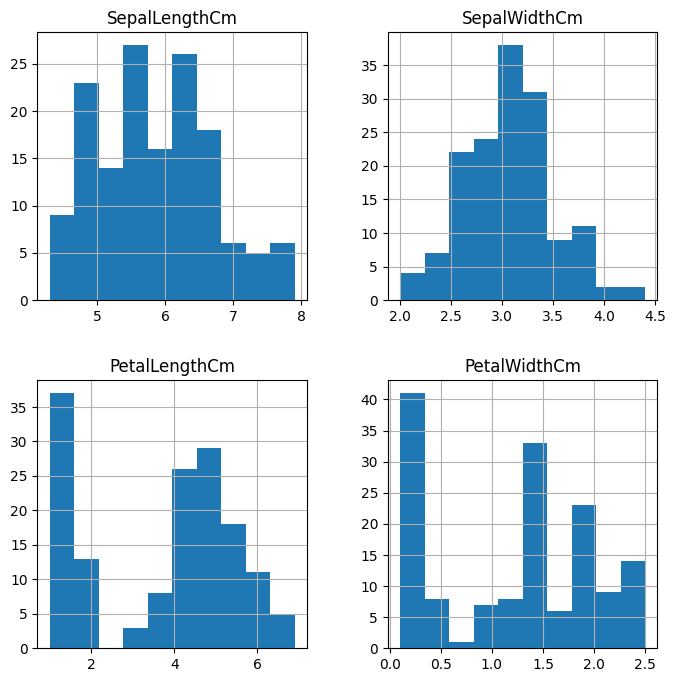

In [ ]:
grafica = data.hist(
    column=["SepalLengthCm",
            "SepalWidthCm",
            "PetalLengthCm",
            "PetalWidthCm"
            ],
    figsize=(8, 8)
    # descomentar para que usen los mismos ejes los 4 gráficos
    #,sharey=True, sharex=True
)

Tenemos 50 flores de cada especie

In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Podemos crear distintos gráficos de pares

(1.5, 4.9)

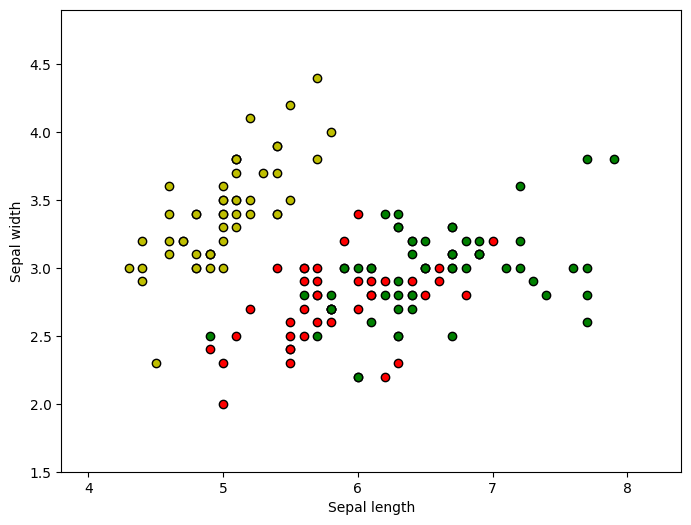

In [ ]:
X = data.loc[:,["SepalLengthCm", "SepalWidthCm"]]
y = data["Species"]

x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
#plt.clf()
plt.scatter(X.iloc[:50, 0], X.iloc[:50, 1], c="y", edgecolor="k")
plt.scatter(X.iloc[50:100, 0], X.iloc[50:100, 1], c="r", edgecolor="k")
plt.scatter(X.iloc[100:150, 0], X.iloc[100:150, 1], c="g", edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

Construimos una función que nos proporcione un gráfico para cada par de columnas

In [ ]:
def grafica_pares(col_x, col_y, nombre_x=None, nombre_y=None):
    # Verifica si se proporcionaron nombres personalizados, de lo contrario, usa los nombres de las columnas
    nombre_x = col_x if not nombre_x else nombre_x
    nombre_y = col_y if not nombre_y else nombre_y

    plt.figure(2, figsize=(8, 6))

    colores = ["y", "r", "g"]
    # Filtra las filas por categoría y utiliza la columna "Species" para colorear los puntos
    for flor, color in zip(y.unique(), colores):
        plt.scatter(data.loc[data["Species"] == flor, col_x], data.loc[data["Species"] == flor, col_y], c=color, label=flor, edgecolor="k")

    # Poner nombres a los ejes
    plt.xlabel(nombre_x)
    plt.ylabel(nombre_y)

    # Límites máximos y mínimos de los ejes
    plt.xlim(data[col_x].min()-0.5, data[col_x].max()+0.5)
    plt.ylim(data[col_y].min()-0.5, data[col_y].max()+0.5)

    plt.legend()  # Agrega la leyenda
    plt.show()

In [ ]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

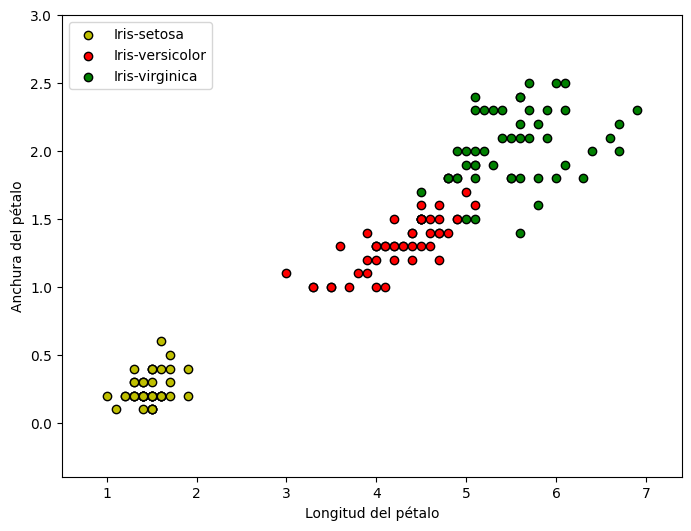

In [ ]:
grafica_pares("PetalLengthCm", "PetalWidthCm", "Longitud del pétalo", "Anchura del pétalo")

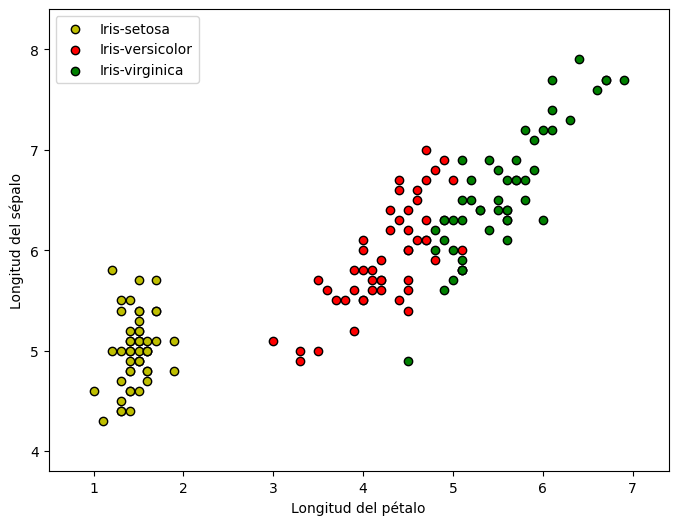

In [ ]:
grafica_pares("PetalLengthCm", "SepalLengthCm", "Longitud del pétalo", "Longitud del sépalo")

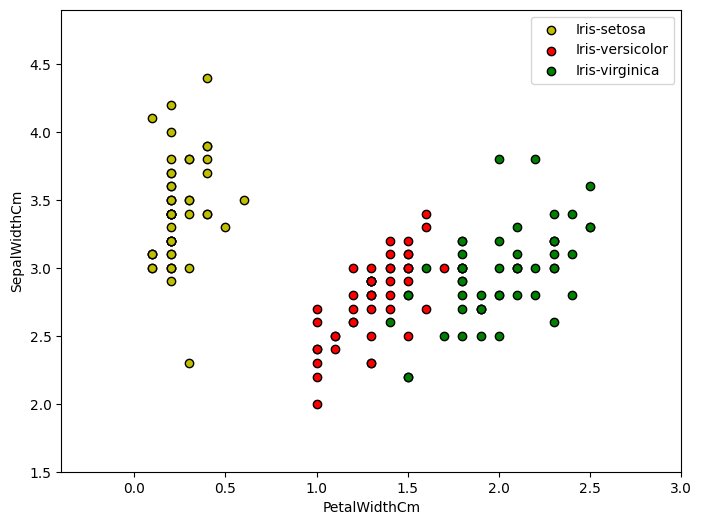

In [ ]:
grafica_pares("PetalWidthCm", "SepalWidthCm")

*A primera vista*, **Petal length** y **petal width** parecen **diverger** de la **distribución normal**.

In [ ]:
import scipy.stats as stats

for param in ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]:
    z, pval = stats.normaltest(data[param])
    #print(z)
    if(pval < 0.055):
        print("%s tiene un valor p de %f - La distribución No es normal" % (param, pval))
    else:
        print("%s tiene un valor p de %f." % (param, pval))


SepalLengthCm tiene un valor p de 0.056824.
SepalWidthCm tiene un valor p de 0.167241.
PetalLengthCm tiene un valor p de 0.000000 - La distribución No es normal
PetalWidthCm tiene un valor p de 0.000000 - La distribución No es normal


### Matriz de correlación

Usamos el método de pearson para hallar las correlaciones.<br>
Es el método por defecto que hemos usado hasta ahora.<br>
Existen otros dos métodos de obtener la correlación.<br>
*method : {‘pearson’, ‘kendall’, ‘spearman’}*

In [ ]:
corr = data.corr(method="pearson")
display(corr)

<ipython-input-18-db65fe4c3314>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method="pearson")


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

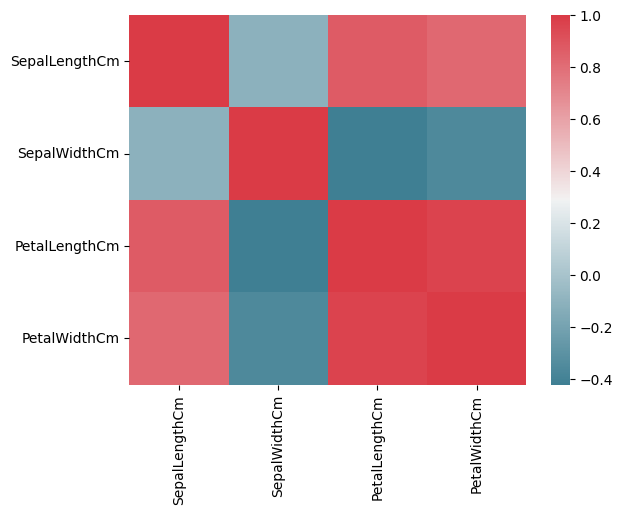

In [ ]:
import seaborn as sns
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Interpretación
Encontramos:
+ una **alta correlación positiva** entre PetalWidth y PetalLength (**0.96**)
+ una **alta correlación positiva** entre PetalLength y SepalLength (**0.87**)
+ una **alta correlación positiva** entre PetalWidth y SepalLength (**0.81**)

Como tal, observamos correlaciones entre estos atributos principales: **PetalWidth**, **PetalLength** y **SepalLength**.

**SepalWidth** parece ser más independiente.

PCC es:
+ 1 es correlación lineal positiva total
+ 0 no es una correlación lineal
+ −1 es la correlación lineal negativa total

## Observación de la correlación en 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

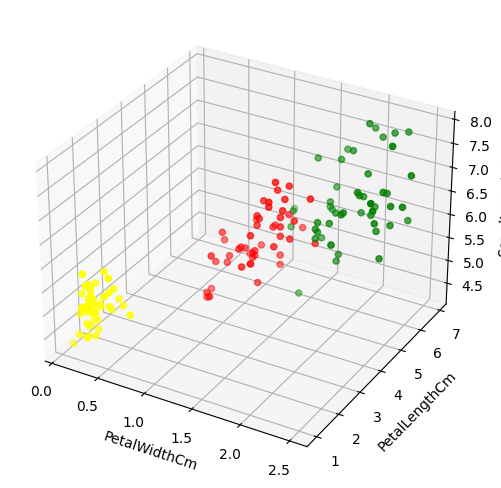

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [data["PetalWidthCm"], data["PetalLengthCm"]]
n = 100
color_theme = np.array(["yellow", "red", "green"])
# Para poder coger el color correspondiente usando un índice en el array anterior
# tengo que convertir los nombres de las espacies en números
especies_num = data["Species"] \
            .replace("Iris-setosa", 0) \
            .replace("Iris-versicolor", 1) \
            .replace("Iris-virginica", 2)
ax.scatter(data["PetalWidthCm"], data["PetalLengthCm"], data["SepalLengthCm"], c = color_theme[especies_num])

ax.set_xlabel('PetalWidthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('SepalLengthCm')

plt.tight_layout(pad=0.5)
plt.show()

# Data analysis - clusterization

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

import math
import random
from numpy.random import permutation

Sustituimos los nombres de las especies por números

In [ ]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data["Species"] = data["Species"] \
            .replace("Iris-setosa", 0) \
            .replace("Iris-versicolor", 1) \
            .replace("Iris-virginica", 2)

In [ ]:
data["Species"].unique()

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

objetivo = "Species"
y = data[objetivo]
X = data.drop([objetivo], axis = 1)

In [ ]:
# Realizamos la particion dejando un 75% para entrenar y un 25% de test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

# Use the model to predict labels for the test data
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 18]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cuadro_matriz_confusion(y_real, y_pred):
    confusion = confusion_matrix(y_real, y_pred)
    categories = np.unique(y_real)

    fig, ax = plt.subplots()
    labels = ['Verdadero\nSetosa', 'Falso 1', 'Falso 2', 'Falso 0', 'Verdadero\nVersicolor', 'Falso 2', 'Falso 0', 'Falso 1', 'Verdadero\nVirginica']

    counts = ['{0:,}'.format(value) for value in confusion.flatten()]

    percentages = ['{0:.2%}'.format(value) for value in confusion.flatten() / np.sum(confusion)]

    labels = [f'{label}\n{count}\n{percentage}' for label, count, percentage in zip(labels, counts, percentages)]
    labels = np.asarray(labels).reshape(len(categories), len(categories))

    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.title('Matriz de confusión')
    plt.show()

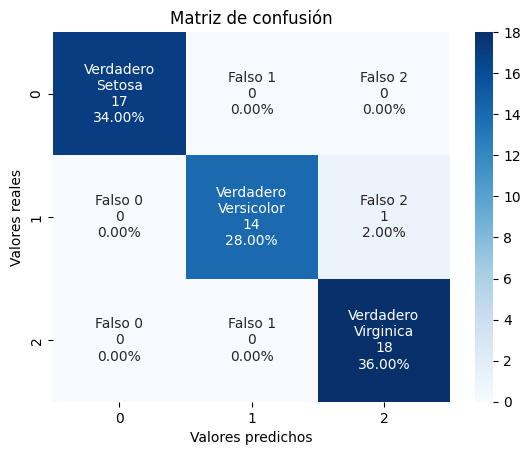

In [ ]:
cuadro_matriz_confusion(y_test, y_pred)

# Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo de regresión logística
modelo_logistico = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_logistico.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)

# Evaluar el rendimiento del modelo
precision = accuracy_score(y_test, y_pred)
informe_clasificacion = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Precisión del modelo: {precision}")
print("Informe de clasificación:")
print(informe_clasificacion)

Precisión del modelo: 0.98
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.97        18

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 18]])

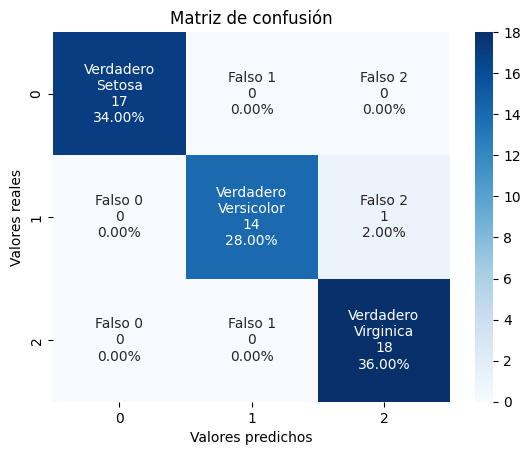

In [ ]:
cuadro_matriz_confusion(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(X)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = X.columns)
X = datos_normalizados.copy()
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96


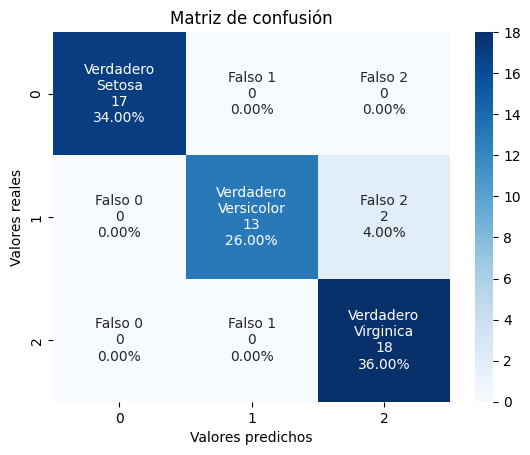

In [ ]:
cuadro_matriz_confusion(y_test, y_pred)

# Árboles de decisión

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO

In [ ]:
modelo = tree.DecisionTreeClassifier(class_weight=None,
                                     criterion='gini',
                                     max_depth=5,
                                     max_features=None,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=3,
                                     min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     random_state=None,
                                     splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
arbol = modelo.fit(X, y)
cross_val_score(arbol, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [ ]:
arbol = modelo.fit(X_train, y_train)
y_pred = arbol.predict(X_test)
accuracy_score(y_test, y_pred)

0.98

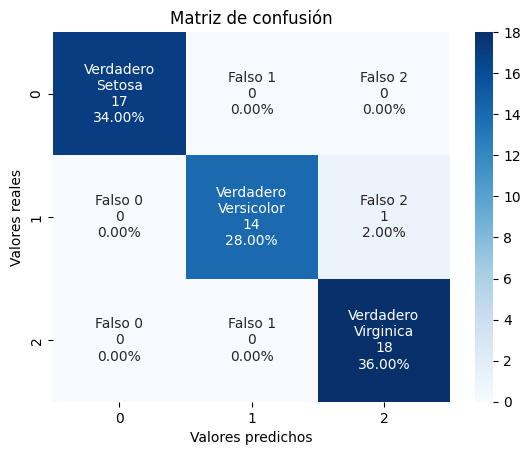

In [ ]:
cuadro_matriz_confusion(y_test, y_pred)

[Text(0.375, 0.875, 'PetalWidthCm <= 0.7\ngini = 0.666\nsamples = 100\nvalue = [33, 35, 32]\nclass = 1'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = 0'),
 Text(0.5, 0.625, 'PetalWidthCm <= 1.65\ngini = 0.499\nsamples = 67\nvalue = [0, 35, 32]\nclass = 1'),
 Text(0.25, 0.375, 'PetalLengthCm <= 4.95\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = 1'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = 1'),
 Text(0.375, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = 2'),
 Text(0.75, 0.375, 'PetalLengthCm <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = 2'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = 2'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]\nclass = 2')]

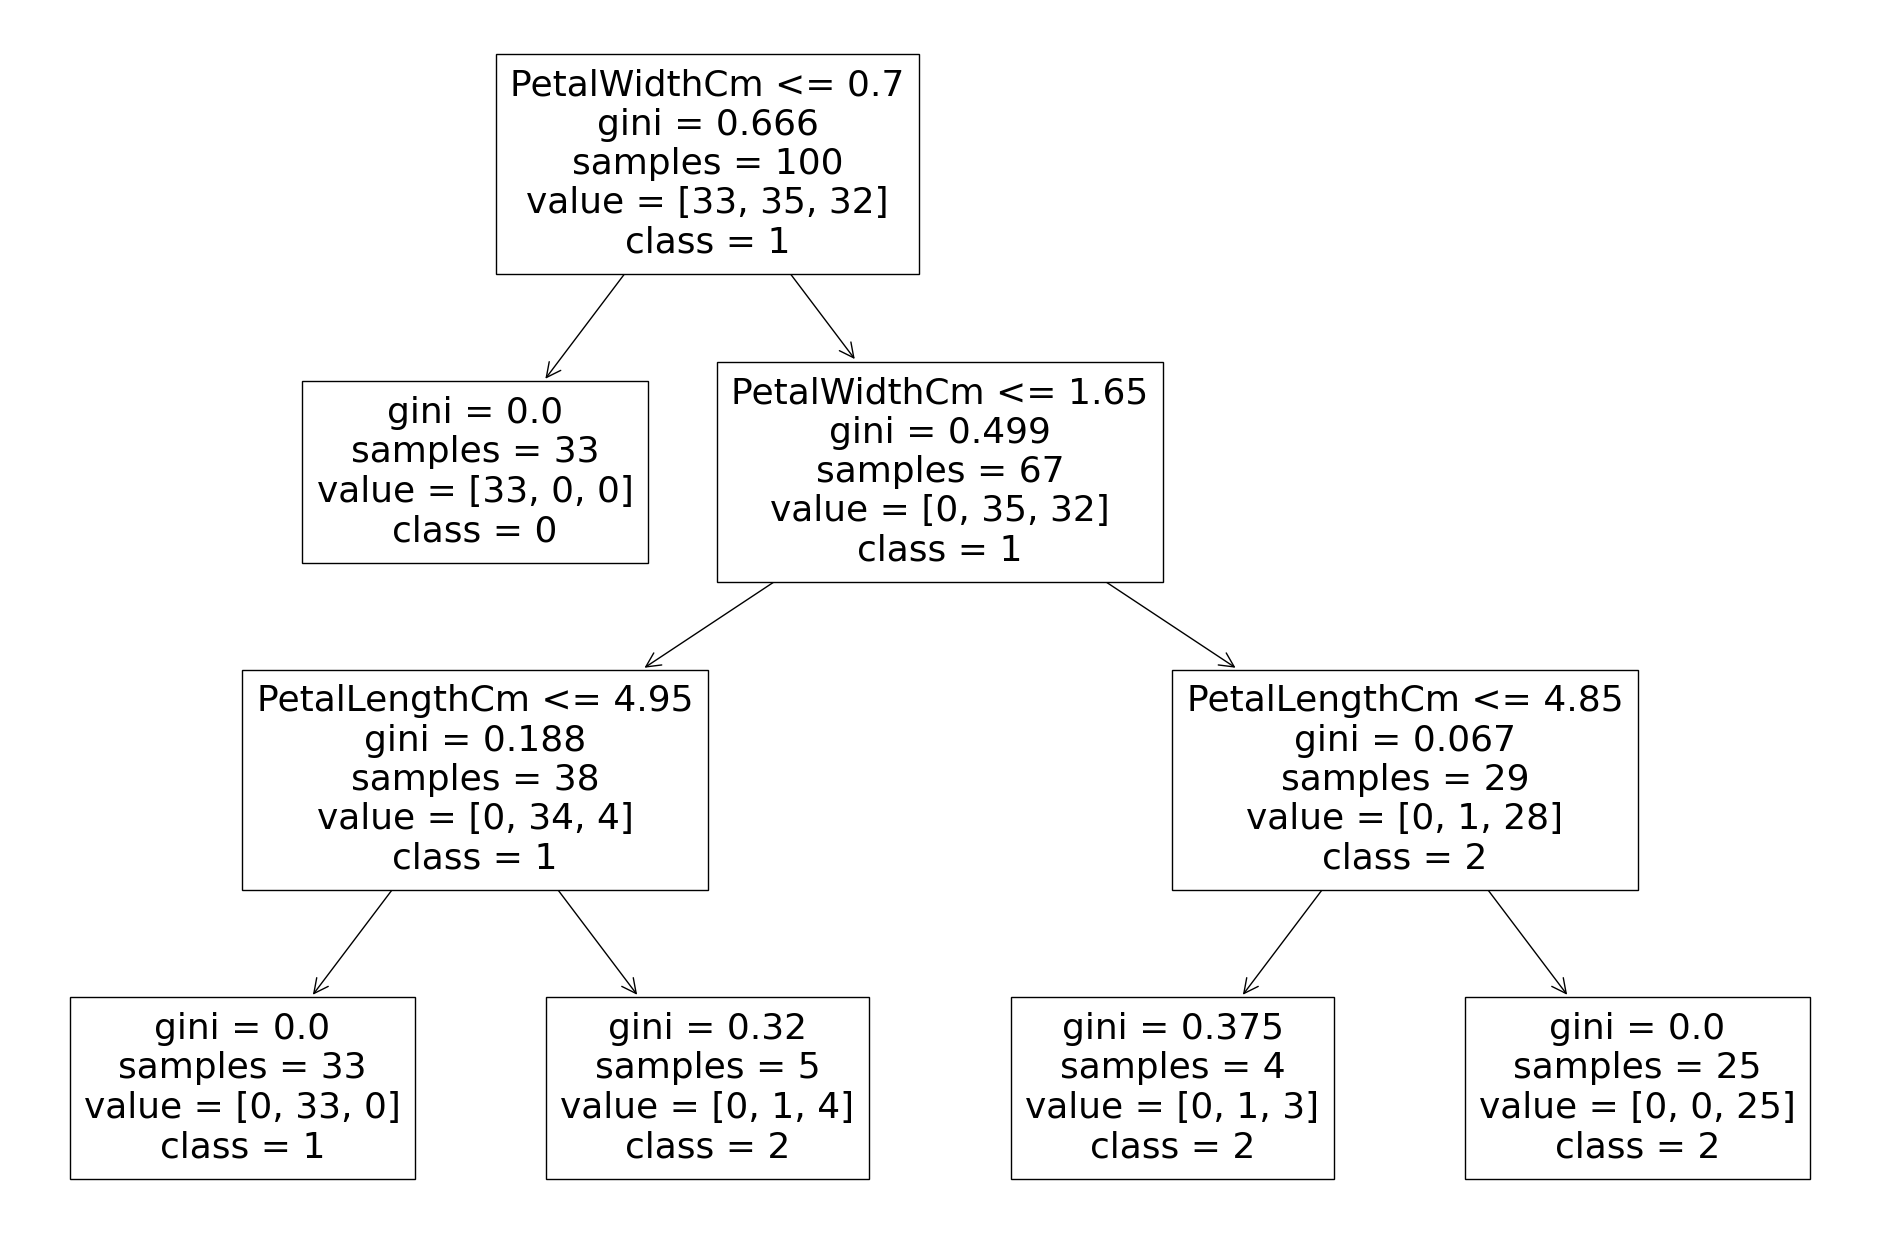

In [ ]:
#Plot the tree
from sklearn.tree import export_graphviz

plt.figure(figsize=(24,16))

tree.plot_tree(arbol.fit(X_train, y_train), feature_names=X.columns,
               class_names=['0', '1', '2'], filled=False)

# XGBoost

In [ ]:
import xgboost as xgb
# conda install -c anaconda py-xgboost

In [ ]:
modelo = xgb.XGBClassifier(base_score=0.5,
                           colsample_bylevel=1,
                           colsample_bytree=1,
                           gamma=0,
                           learning_rate=0.05,
                           max_delta_step=0,
                           max_depth=5,
                           min_child_weight=1,
                           missing=1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           reg_alpha=0,
                           reg_lambda=1,
                           scale_pos_weight=1,
                           seed=0,
                           verbosity=0,
                           subsample=1)

In [ ]:
XGBoost = modelo.fit(X_train, y_train)
y_pred = XGBoost.predict(X_test)
accuracy_score(y_test, y_pred)

0.98

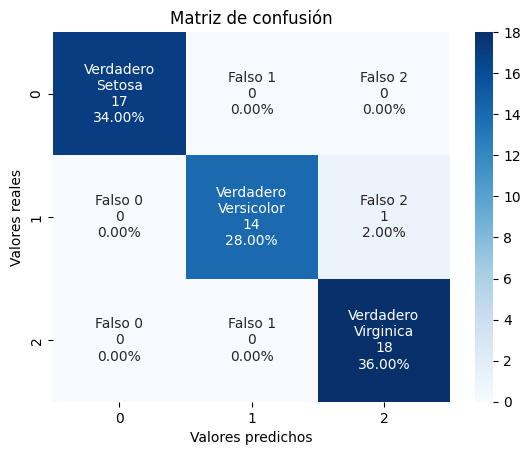

In [ ]:
cuadro_matriz_confusion(y_test, y_pred)